In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import h5py as h5
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers

In [4]:
# Read H5 file
f = h5.File("/content/drive/MyDrive/AIML/DEEP LEARNING/Part4.h5", "r")
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f.keys()]
for n in datasetNames:
  print(n)

X_test
X_train
X_val
y_test
y_train
y_val


Label: 7


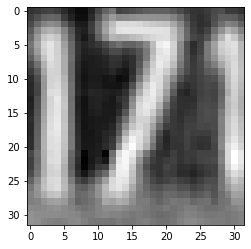

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(f['y_train'][8]))
plt.imshow(f['X_train'][8], cmap='gray')

In [6]:
print(f['X_train'].shape)
print(f['y_train'].shape)
print(f['X_test'].shape)
print(f['y_test'].shape)
print(f['X_val'].shape)
print(f['y_val'].shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


In [7]:
#Load Data into sets
x_train=f['X_train'][...]
y_train=f['y_train'][...]

x_test=f['X_test'][...]
y_test=f['y_test'][...]

x_val=f['X_val'][...]
y_val=f['y_val'][...]

In [8]:
#After loading data from .h5 file
print('Shape of c',x_train.shape)
print('Shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('Shape of y_test',y_test.shape)
print('Shape of x_val',x_val.shape)
print('Shape of y_val',y_val.shape)

Shape of c (42000, 32, 32)
Shape of y_train (42000,)
shape of x_test (18000, 32, 32)
Shape of y_test (18000,)
Shape of x_val (60000, 32, 32)
Shape of y_val (60000,)


### Reshape train and test sets into compatible shapes

In [9]:
x_train = x_train.reshape(42000, 1024)
print(x_train.shape)
x_test = x_test.reshape(18000, 1024)
print(x_test.shape)
x_val = x_val.reshape(60000, 1024)
print(x_val.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


In [10]:
#After doing Reshape
print('Shape of c',x_train.shape)
print('Shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('Shape of y_test',y_test.shape)
print('Shape of x_val',x_val.shape)
print('Shape of y_val',y_val.shape)

Shape of c (42000, 1024)
Shape of y_train (42000,)
shape of x_test (18000, 1024)
Shape of y_test (18000,)
Shape of x_val (60000, 1024)
Shape of y_val (60000,)


In [11]:
# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

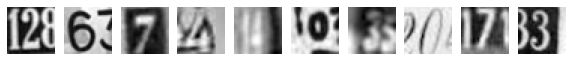

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [12]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### One-hot encode the class vector

In [13]:

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (42000, 10)
One value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
model = Sequential()
model.add(Dense(x_train.shape[1], activation='linear', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [15]:
learning_rate=0.00001
sgd = optimizers.Adam(lr=learning_rate)

In [35]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

#Early Stopping
earlystop = EarlyStopping(monitor = 'accuracy',min_delta = 0.001,patience = 10, verbose = 1,restore_best_weights = True)


# Fit the model
model.fit(x=x_train, y=y_train, batch_size=700, epochs=200, validation_data=(x_val, y_val),callbacks=earlystop)

Epoch 1/200
60/60 [==============================] - 8s 127ms/step - loss: 0.2986 - accuracy: 0.9236 - val_loss: 0.3856 - val_accuracy: 0.8959
Epoch 2/200
60/60 [==============================] - 7s 124ms/step - loss: 0.2962 - accuracy: 0.9242 - val_loss: 0.3774 - val_accuracy: 0.8999
Epoch 3/200
60/60 [==============================] - 7s 125ms/step - loss: 0.2920 - accuracy: 0.9233 - val_loss: 0.3783 - val_accuracy: 0.8987
Epoch 4/200
60/60 [==============================] - 7s 125ms/step - loss: 0.2941 - accuracy: 0.9243 - val_loss: 0.3880 - val_accuracy: 0.8949
Epoch 5/200
60/60 [==============================] - 7s 125ms/step - loss: 0.2934 - accuracy: 0.9249 - val_loss: 0.3782 - val_accuracy: 0.8987
Epoch 6/200
60/60 [==============================] - 7s 125ms/step - loss: 0.2943 - accuracy: 0.9243 - val_loss: 0.3770 - val_accuracy: 0.8999
Epoch 7/200
60/60 [==============================] - 7s 125ms/step - loss: 0.2906 - accuracy: 0.9252 - val_loss: 0.3764 - val_accuracy: 0.9004

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,186,186
Trainable params: 1,184,138
Non-trainable params: 2,048
_________________________________________________________________


In [37]:
y_test.shape

(18000, 10)

In [38]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [39]:
Y_pred_cls = model.predict_classes(x_test, batch_size=200, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


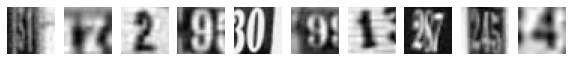

label for each of the above image: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [42]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

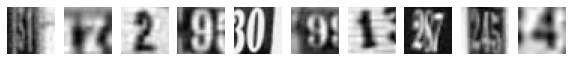

label for each of the above image: [1 2 2 9 0 9 1 5 1 4]


In [40]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (Y_pred_cls[0:10]))

In [43]:
model.evaluate(x_test, y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.5631 - accuracy: 0.8478


[0.5631409883499146, 0.8478333353996277]

Test Data accuracy is 84% 
As we can see in the visualization out of 10 we are able to correctky for 7 images.

Train data -92%
Validation - 90%
Test Data - 84%